<a href="https://colab.research.google.com/github/lharnim/MINI-PROJECT-UPDATES/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.0+cu116
    Uninstalling torchaudio-0.13.0+cu116:
      Successfully uninstalled torchaudio-0.13.0+cu116
ERROR: pip's dependency resolver does no

In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#im_1_path = './images/1_carplate.jpg'
im_2_path = '/content/sample_data/image.jpg'
im_3_path = '/content/sample_data/image2.jpg'
im_4_path = '/content/sample_data/image4.jpg'
im_5_path = '/content/sample_data/image5.jpg'

In [34]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [33]:
result = recognize_text(im_5_path)

In [35]:
result

[([[35, 43], [551, 43], [551, 129], [35, 129]],
  'CHAPTER I',
  0.8607965056607263),
 ([[573, 41], [1559, 41], [1559, 131], [573, 131]],
  'Down the Rabbit-Hole',
  0.7091881831781658),
 ([[32, 214], [622, 214], [622, 290], [32, 290]],
  'Alice was beginning to',
  0.8303518604575635),
 ([[724, 213], [1748, 213], [1748, 289], [724, 289]],
  'very tired of sitting by her sister on the',
  0.9364748174171892),
 ([[29, 285], [1734, 285], [1734, 369], [29, 369]],
  'bank, and of having nothing to do: once or twice she had peeped',
  0.6224765549788552),
 ([[27, 358], [1629, 358], [1629, 442], [27, 442]],
  'into the book her sister was reading, but it had no pictures or',
  0.880859012659442),
 ([[31, 441], [525, 441], [525, 507], [31, 507]],
  'conversations in it,',
  0.6552646798860838),
 ([[544, 437], [1712, 437], [1712, 515], [544, 515]],
  "and what is the use of a book;' thought Alice",
  0.7829973311781163),
 ([[28, 506], [913, 506], [913, 590], [28, 590]],
  "'without pictures or

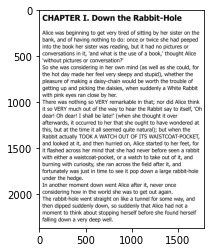

In [36]:
img_1 = cv2.imread(im_5_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [37]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: CHAPTER I (Probability: 0.86)
Detected text: Down the Rabbit-Hole (Probability: 0.71)
Detected text: Alice was beginning to (Probability: 0.83)
Detected text: very tired of sitting by her sister on the (Probability: 0.94)
Detected text: bank, and of having nothing to do: once or twice she had peeped (Probability: 0.62)
Detected text: into the book her sister was reading, but it had no pictures or (Probability: 0.88)
Detected text: conversations in it, (Probability: 0.66)
Detected text: and what is the use of a book;' thought Alice (Probability: 0.78)
Detected text: 'without pictures or conversation?' (Probability: 0.93)
Detected text: So she was considering in her own mind (as well as she could, for (Probability: 0.80)
Detected text: the hot (Probability: 0.99)
Detected text: made her feel very sleepy and stupid), whether the (Probability: 0.82)
Detected text: pleasure of making a daisy-chain would be worth the trouble of (Probability: 0.83)
Detected text: getting up and

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

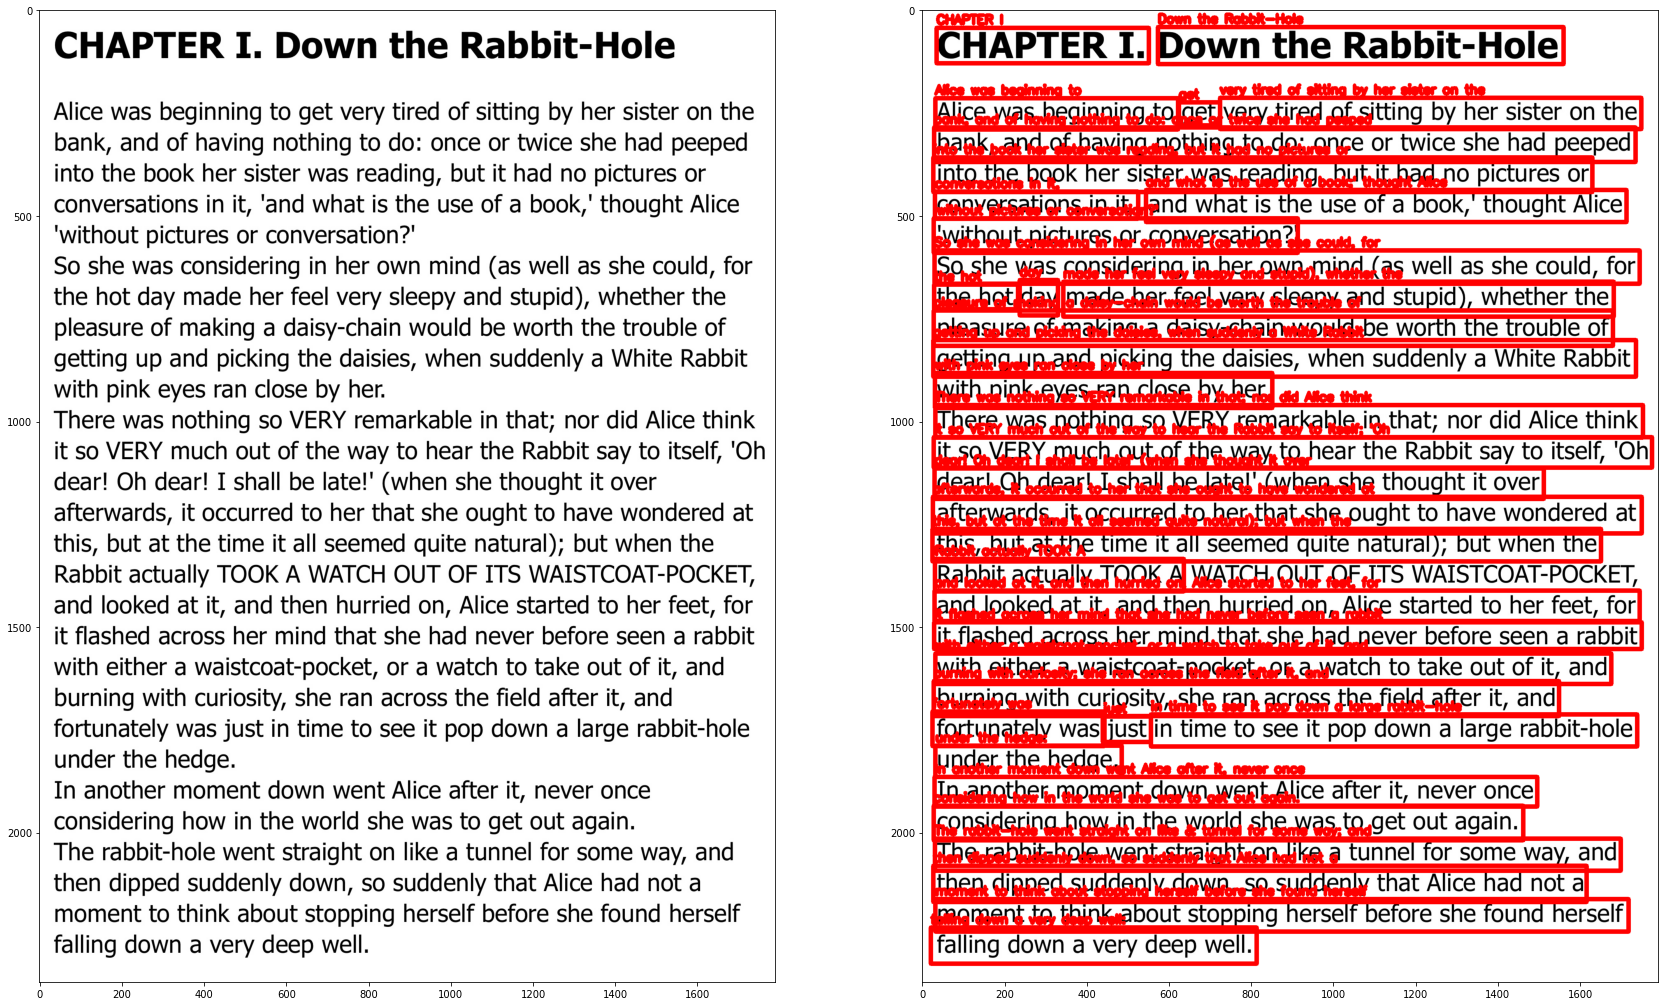

In [39]:
overlay_ocr_text(im_5_path, '1_carplate')

In [43]:
result = recognize_text(im_2_path)

In [44]:
result

[([[235, 115], [501, 115], [501, 183], [235, 183]],
  'MAKE TEXT',
  0.9995702726576994),
 ([[165, 225], [565, 225], [565, 293], [165, 293]],
  'STAND OUT FROM',
  0.7502459281803265),
 ([[195, 335], [595, 335], [595, 403], [195, 403]],
  'BACKGROUNDS %',
  0.5066884255734012)]

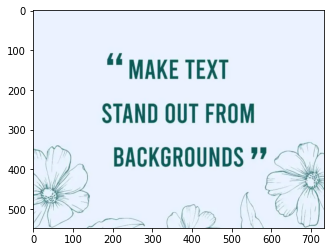

In [45]:
img_1 = cv2.imread(im_2_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [47]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')


Detected text: MAKE TEXT (Probability: 1.00)
Detected text: STAND OUT FROM (Probability: 0.75)
Detected text: BACKGROUNDS % (Probability: 0.51)


FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

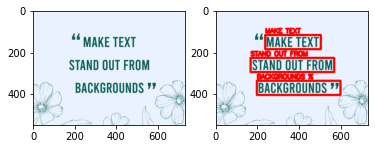

In [48]:
overlay_ocr_text(im_2_path, 'image2')